<a href="https://colab.research.google.com/github/VaniaJesus/Ml-Mack/blob/main/Aprend_Maq_Trabalho_A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Este trabalho tem como objetivo responder, por meio de algoritmos de classificação, qual o algoritmo consegue identificar se um acidente é grave ou não de acordo com os danos que o acidente causou na aeronave e se houve mortos ou pessoas com lesões graves.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [6]:
url = 'https://raw.githubusercontent.com/VaniaJesus/Ml-Mack/main/V_OCORRENCIA_AMPLA.csv'
dados = pd.read_csv(url,skiprows=1, sep=";", encoding= "utf-8")
dados.head()



,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Tripulantes,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO
0,25043,202019110,CARAJÁS SERVIÇOS DE LOCAÇÃO LTDA EPF,Incidente,2020-06-17,22:10,ALTO ALEGRE,RR,Norte,OUTROS,...,NaN,NaN,NaN,182K,L1P,C182,1270.0,4.0,CESSNA AIRCRAFT,verdadeiro
1,25081,0940/2013,TAP AIR PORTUGAL,Incidente,2013-04-13,17:56,Brasília,DF,Centro-Oeste,COLISÃO NO SOLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,falso
2,25503,202023366,AZUL,Incidente,2020-10-02,19:02,CAMPINAS,SP,Sudeste,FOGO/FUMAÇA,...,NaN,NaN,NaN,ERJ 190-400,L2J,E295,61500.0,143.0,EMBRAER,verdadeiro
3,25623,202021754,JOAO MAURICIO GOTTARDI LOPES,Incidente,2020-10-07,15:30,ARAÇATUBA,SP,Sudeste,CONTATO ANORMAL COM A PISTA,...,NaN,NaN,NaN,180J,L1P,C180,1270.0,6.0,CESSNA AIRCRAFT,verdadeiro
4,25624,202004387,JOSE LUIZ CUNHA RODRIGUES,Incidente,2020-10-06,15:25,SÃO PAULO,SP,Sudeste,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,...,NaN,NaN,NaN,M20J,L1P,M20P,1243.0,4.0,MOONEY AIRCRAFT,verdadeiro


In [7]:
dados.dtypes

Numero_da_Ocorrencia                  int64
Numero_da_Ficha                      object
Operador_Padronizado                 object
Classificacao_da_Ocorrencia          object
Data_da_Ocorrencia                   object
Hora_da_Ocorrencia                   object
Municipio                            object
UF                                   object
Regiao                               object
Descricao_do_Tipo                    object
ICAO                                 object
Latitude                             object
Longitude                            object
Tipo_de_Aerodromo                    object
Historico                            object
Matricula                            object
Categoria_da_Aeronave                object
Operador                             object
Tipo_de_Ocorrencia                   object
Fase_da_Operacao                     object
Operacao                             object
Danos_a_Aeronave                     object
Aerodromo_de_Destino            

In [8]:
dados.shape

(12258, 45)

In [9]:
dados.isnull().sum()

Numero_da_Ocorrencia                   0
Numero_da_Ficha                        3
Operador_Padronizado                  89
Classificacao_da_Ocorrencia            0
Data_da_Ocorrencia                     0
Hora_da_Ocorrencia                  3655
Municipio                           3696
UF                                    12
Regiao                               746
Descricao_do_Tipo                   3009
ICAO                                8795
Latitude                            3995
Longitude                           4003
Tipo_de_Aerodromo                   8936
Historico                            282
Matricula                              0
Categoria_da_Aeronave                 19
Operador                              89
Tipo_de_Ocorrencia                  3009
Fase_da_Operacao                    3377
Operacao                             106
Danos_a_Aeronave                    3710
Aerodromo_de_Destino                4645
Aerodromo_de_Origem                 4583
Lesoes_Fatais_Tr

In [10]:
# tratar os dados nulos

dados.fillna(0, inplace=True)


In [11]:
dados1 = dados[['Numero_da_Ocorrencia', 'Danos_a_Aeronave','Lesoes_Fatais_Tripulantes','Lesoes_Fatais_Passageiros','Lesoes_Fatais_Terceiros', 'Lesoes_Graves_Tripulantes','Lesoes_Graves_Terceiros','Lesoes_Graves_Passageiros']]
dados1

,Numero_da_Ocorrencia,Danos_a_Aeronave,Lesoes_Fatais_Tripulantes,Lesoes_Fatais_Passageiros,Lesoes_Fatais_Terceiros,Lesoes_Graves_Tripulantes,Lesoes_Graves_Terceiros,Lesoes_Graves_Passageiros
0,25043,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0
1,25081,Leve,0.0,0.0,0.0,0.0,0.0,0.0
2,25503,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0
3,25623,Leve,0.0,0.0,0.0,0.0,0.0,0.0
4,25624,Leve,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12253,36306,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0
12254,36346,Substancial,1.0,1.0,0.0,0.0,0.0,0.0
12255,36348,Leve,0.0,0.0,0.0,0.0,0.0,0.0
12256,36349,Substancial,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Criar a coluna total mortes
dados1 = dados1.copy()
dados1['Total_Mortes'] = dados1[['Lesoes_Fatais_Tripulantes', 'Lesoes_Fatais_Passageiros', 'Lesoes_Fatais_Terceiros']].sum(axis=1)


In [13]:
# criar coluna de lesões graves = 0/1
dados1['Total_lesoesGraves'] = dados1[['Lesoes_Graves_Tripulantes', 'Lesoes_Graves_Terceiros', 'Lesoes_Graves_Passageiros']].sum(axis=1)

In [14]:
dados1['Total_lesoesGraves'].value_counts()

0.0    11864
1.0      265
2.0       91
3.0       20
4.0       12
6.0        3
7.0        3
Name: Total_lesoesGraves, dtype: int64

In [15]:
dados1['Total_Mortes'].value_counts()

0.0      11443
1.0        406
2.0        227
3.0         69
4.0         57
5.0         22
6.0         14
7.0          6
8.0          4
14.0         2
154.0        1
199.0        1
24.0         1
16.0         1
23.0         1
33.0         1
10.0         1
19.0         1
Name: Total_Mortes, dtype: int64

In [16]:
dados1

,Numero_da_Ocorrencia,Danos_a_Aeronave,Lesoes_Fatais_Tripulantes,Lesoes_Fatais_Passageiros,Lesoes_Fatais_Terceiros,Lesoes_Graves_Tripulantes,Lesoes_Graves_Terceiros,Lesoes_Graves_Passageiros,Total_Mortes,Total_lesoesGraves
0,25043,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25081,Leve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25503,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25623,Leve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25624,Leve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12253,36306,Nenhum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12254,36346,Substancial,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
12255,36348,Leve,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12256,36349,Substancial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#contabilizando dados duplicados

print(dados1.duplicated().sum())

894


In [19]:
print(dados1.duplicated(subset=['Numero_da_Ocorrencia']).sum())

912


In [20]:
# Remoção de dados duplicados

dados1 = dados1.drop_duplicates(subset=['Numero_da_Ocorrencia'], keep='first')

In [ ]:
# Correção na coluna danos a Aeronave

dados1['Danos_a_Aeronave'] = dados1['Danos_a_Aeronave'].replace('Nenhum', 0)

In [ ]:
# Correção dos demais dados da coluna danos a Aeronave

valores_a_substituir = {
    'Leve': 1,
    'Substancial': 1,
    'Destruída': 1,
    'Desconhecida': 1
}

dados1['Danos_a_Aeronave'] = dados1['Danos_a_Aeronave'].replace(valores_a_substituir)

In [23]:
dados1['Danos_a_Aeronave'].value_counts()

0    7106
1    4240
Name: Danos_a_Aeronave, dtype: int64

In [24]:
dados_fim = dados1[['Numero_da_Ocorrencia', 'Danos_a_Aeronave','Total_Mortes','Total_lesoesGraves']]
dados_fim

,Numero_da_Ocorrencia,Danos_a_Aeronave,Total_Mortes,Total_lesoesGraves
0,25043,0,0.0,0.0
1,25081,1,0.0,0.0
2,25503,0,0.0,0.0
3,25623,1,0.0,0.0
4,25624,1,0.0,0.0
...,...,...,...,...
12253,36306,0,0.0,0.0
12254,36346,1,2.0,0.0
12255,36348,1,0.0,0.0
12256,36349,1,0.0,0.0


In [ ]:
# Cria uma nova coluna 'resposta' baseada nas condições 0 = nenhuma morte nem dano e 1= alguma morte e/ou algum dano

dados_fim['resposta'] = dados_fim.apply(
    lambda row: 1 if (row['Danos_a_Aeronave'] + row['Total_Mortes'] + row['Total_lesoesGraves']) >= 1 else 0,
    axis=1
)





In [27]:
dados_fim

,Numero_da_Ocorrencia,Danos_a_Aeronave,Total_Mortes,Total_lesoesGraves,resposta
0,25043,0,0.0,0.0,0
1,25081,1,0.0,0.0,1
2,25503,0,0.0,0.0,0
3,25623,1,0.0,0.0,1
4,25624,1,0.0,0.0,1
...,...,...,...,...,...
12253,36306,0,0.0,0.0,0
12254,36346,1,2.0,0.0,1
12255,36348,1,0.0,0.0,1
12256,36349,1,0.0,0.0,1


In [28]:
# modelo 1

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


X = dados_fim.drop(columns=['Numero_da_Ocorrencia','resposta'])
y = dados_fim['resposta']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state= 123)

base_estimators = [DecisionTreeClassifier()]

param_grids = [{'max_depth': [2,3,4,5]}]

for i in range(len(base_estimators)):
  clf = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(clf.best_estimator_)
  print()
  print("Detailed classification report:")
  print()
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print()

  print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

DecisionTreeClassifier(max_depth=3)

Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      1406

    accuracy                           1.00      3404
   macro avg       1.00      1.00      1.00      3404
weighted avg       1.00      1.00      1.00      3404


Treinaremos com 7942 elementos e testaremos com 3404 elementos


In [37]:
!pip install graphviz==0.20
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


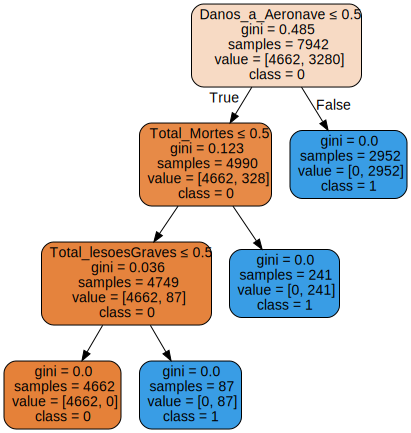

In [48]:
from sklearn.tree import export_graphviz
import graphviz

# Supondo que 'clf' é o seu GridSearchCV após o ajuste
best_tree = clf.best_estimator_

dot_data = export_graphviz(best_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph


In [35]:
# Modelo 2



In [36]:
from sklearn.ensemble import RandomForestClassifier

X = dados_fim.drop(columns=['Numero_da_Ocorrencia','resposta'])
y = dados_fim['resposta']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state= 45)

base_estimators = [RandomForestClassifier()]

param_grids = [{'n_estimators':[3,4,5,6]}]

for i in range(len(base_estimators)):
  clf = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='accuracy')
  clf.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(clf.best_estimator_)
  print()
  print("Detailed classification report:")
  print()
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print()

  print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

RandomForestClassifier(n_estimators=3)

Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      1406

    accuracy                           1.00      3404
   macro avg       1.00      1.00      1.00      3404
weighted avg       1.00      1.00      1.00      3404


Treinaremos com 7942 elementos e testaremos com 3404 elementos
